<a href="https://colab.research.google.com/github/sourabh-pandav/STOCK-RISK-ANALYSIS/blob/main/STOCK_RISK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


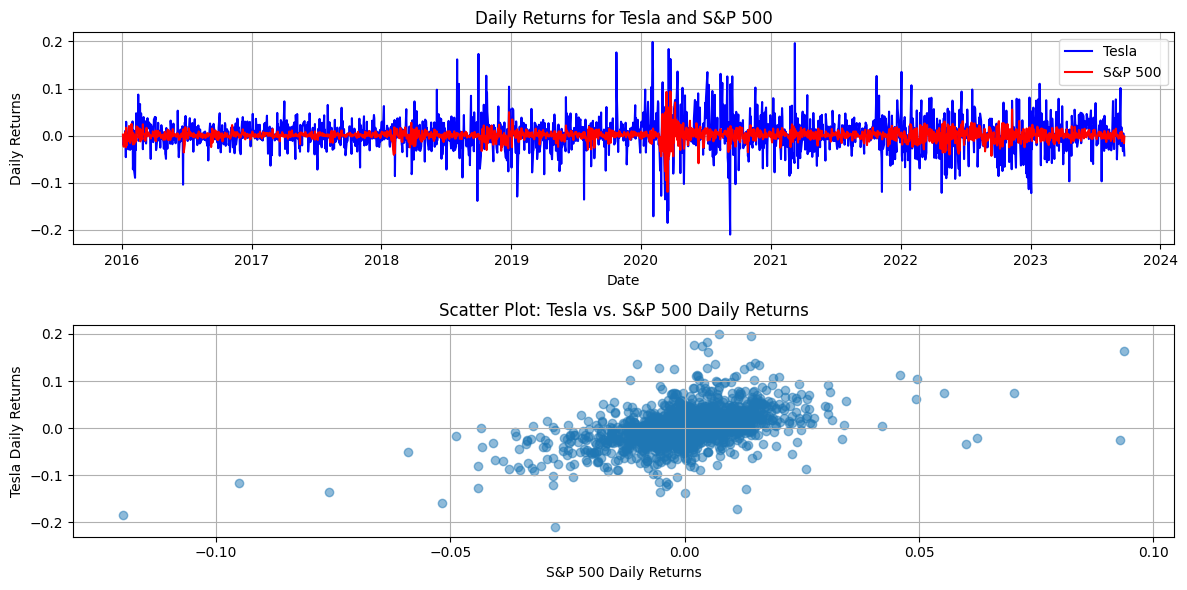

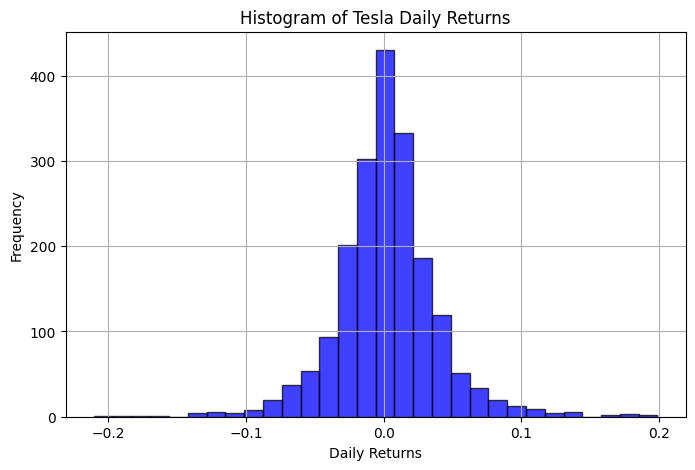

Tesla Performance Metrics:
Metric              Value
------------  -----------
Alpha          1.45913
Beta           0.00144618
Sharpe Ratio  -0.754562


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf
%matplotlib inline

# Define the tickers for Tesla and S&P 500
tesla_ticker = "TSLA"
sp500_ticker = "^GSPC"

# Download historical data for Tesla and S&P 500
tesla_data = yf.download(tesla_ticker, start="2016-01-04", end="2023-09-25")
sp500_data = yf.download(sp500_ticker, start="2016-01-04", end="2023-09-25")

# Calculate daily percentage changes for Tesla and S&P 500
tesla_daily_returns = tesla_data['Adj Close'].pct_change()
sp500_daily_returns = sp500_data['Adj Close'].pct_change()

# Calculate cumulative returns
tesla_cumulative_returns = (1 + tesla_daily_returns).cumprod()
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod()

# Calculate alpha and beta
alpha, beta = np.polyfit(sp500_daily_returns[1:], tesla_daily_returns[1:], 1)

# Calculate the Sharpe ratio for Tesla
risk_free_rate = 0.03  # Adjust the risk-free rate as needed
tesla_sharpe_ratio = (tesla_daily_returns.mean() - risk_free_rate) / tesla_daily_returns.std()

# Plot daily returns for Tesla and S&P 500
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tesla_daily_returns.index, tesla_daily_returns, label='Tesla', color='blue')
plt.plot(sp500_daily_returns.index, sp500_daily_returns, label='S&P 500', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns for Tesla and S&P 500')
plt.legend()
plt.grid(True)

# Scatter plot for Tesla vs. S&P 500 with different colors

plt.subplot(2, 1, 2)
plt.scatter(sp500_daily_returns, tesla_daily_returns, alpha=0.5)
plt.xlabel('S&P 500 Daily Returns')
plt.ylabel('Tesla Daily Returns')
plt.title('Scatter Plot: Tesla vs. S&P 500 Daily Returns')
plt.grid(True)

plt.tight_layout()
plt.show()


# Histogram of Tesla's daily returns
plt.figure(figsize=(8, 5))
plt.hist(tesla_daily_returns[1:], bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Tesla Daily Returns')
plt.grid(True)
plt.show()

# Print the performance metrics
print("Tesla Performance Metrics:")
print(tabulate([['Alpha', alpha], ['Beta', beta], ['Sharpe Ratio', tesla_sharpe_ratio]], headers=['Metric', 'Value']))


[*********************100%%**********************]  1 of 1 completed
Value at Risk (VaR) and Conditional Value at Risk (CVaR):
        Value at Risk
VaR 5%      -0.053459
VaR 1%      -0.095196
VaR 0%      -0.172572
         Conditional Value at Risk
CVaR 5%                  -0.082460
CVaR 1%                  -0.130649
CVaR 0%                  -0.198203

Total Losses for Different Threshold Scenarios:
            Total Loss
Loss at 1%    0.709070
Loss at 2%    1.176554
Loss at 3%    1.652339
Loss at 4%    2.024707
Loss at 5%    2.842153


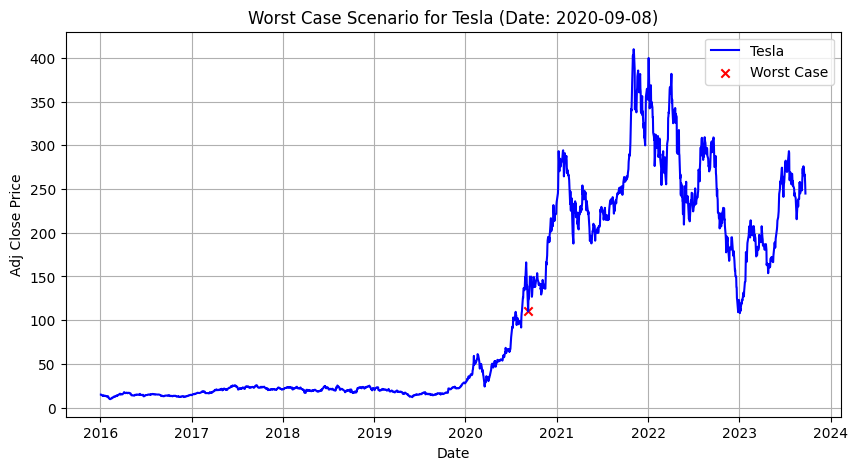

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
from tabulate import tabulate
%matplotlib inline

# Define the ticker for Tesla
ticker = "TSLA"

# Download historical data for Tesla
stock_data = yf.download(ticker, start="2016-01-04", end="2023-09-25")

# Calculate daily percentage changes in adjusted close price
daily_close_pct_change = stock_data['Adj Close'].pct_change()

# Calculate Value at Risk (VaR) at different confidence levels (5%, 1%, and 0.1%)
confidence_levels = [0.05, 0.01, 0.001]
var_results = {}

for confidence_level in confidence_levels:
    var = daily_close_pct_change.quantile(confidence_level)
    var_results[f"VaR {int(100*confidence_level)}%"] = [var]

# Calculate Conditional Value at Risk (CVaR) at the same confidence levels
cvar_results = {}

for confidence_level in confidence_levels:
    cvar = daily_close_pct_change[daily_close_pct_change <= var_results[f"VaR {int(100*confidence_level)}%"][0]].mean()
    cvar_results[f"CVaR {int(100*confidence_level)}%"] = [cvar]

# Create a table for VaR and CVaR
var_table = pd.DataFrame(var_results).transpose()
var_table.columns = ['Value at Risk']
cvar_table = pd.DataFrame(cvar_results).transpose()
cvar_table.columns = ['Conditional Value at Risk']


# Display VaR and CVaR tables
print("Value at Risk (VaR) and Conditional Value at Risk (CVaR):")
print(var_table)
print(cvar_table)

# Find the date of the worst-case scenario
worst_case_date = daily_close_pct_change.idxmin()
worst_case_scenario = stock_data.loc[worst_case_date]['Adj Close']

# Plot the worst-case scenario
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Tesla', color='blue')
plt.scatter(worst_case_date, worst_case_scenario, color='red', marker='x', label='Worst Case')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title(f'Worst Case Scenario for Tesla (Date: {worst_case_date.strftime("%Y-%m-%d")})')
plt.legend()
plt.grid(True)

# Calculate losses for different threshold scenarios
thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]
loss_results = {}

for threshold in thresholds:
    threshold_return = daily_close_pct_change.quantile(threshold)
    losses = -stock_data['Adj Close'].pct_change().apply(lambda x: min(x - threshold_return, 0))
    total_loss = losses.sum()
    loss_results[f"Loss at {int(threshold * 100)}%"] = [total_loss]

# Create a table of losses
loss_table = pd.DataFrame(loss_results).transpose()
loss_table.columns = ['Total Loss']

# Display the table of losses
print("\nTotal Losses for Different Threshold Scenarios:")
print(loss_table)

plt.show()


In [17]:
import yfinance as yf
import numpy as np

# Define the stock symbol (Tesla)
stock_symbol = "TSLA"

# Define the number of shares you own
num_shares = 100

# Define the current stock price
current_stock_price = 247

# Define the protection level (10% decline)
protection_level = 0.30

# Calculate the strike price for the put options
strike_price = current_stock_price * (1 - protection_level)

# Define the expiration date (three months from now)
expiration_date = "2023-10-23"  # Replace with the actual expiration date

# Fetch stock data
stock_data = yf.Ticker(stock_symbol)
stock_history = stock_data.history(period="1d", interval="1d")

# Calculate the historical volatility (annualized)
historical_volatility = np.std(np.log(stock_history["Close"] / stock_history["Close"].shift(1))) * np.sqrt(252)

# Calculate the Black-Scholes option price
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type="put"):
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

# Define risk-free rate (you can use the current rate)
risk_free_rate = 0.03  # Replace with the actual risk-free rate

# Calculate the option price using Black-Scholes
option_price = black_scholes(
    current_stock_price, strike_price, (pd.to_datetime(expiration_date) - pd.Timestamp.today()).days / 365,
    risk_free_rate, historical_volatility
)

# Calculate the cost of purchasing the put option contracts
option_cost = option_price * num_shares

# Print the details of the hedging strategy
print(f"Number of Shares Owned: {num_shares}")
print(f"Current Stock Price: ${current_stock_price}")
print(f"Strike Price of Put Options: ${strike_price}")
print(f"Cost of Put Option Contracts: ${option_cost:.2f}")


Number of Shares Owned: 100
Current Stock Price: $247
Strike Price of Put Options: $172.89999999999998
Cost of Put Option Contracts: $nan
